In [1]:
#import modules requied for processing data
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#read the csv file consisting of the whole bigmart sales dataset with different attributes
ds = pd.read_csv("C:/Users/hp/Desktop/Machine_Learning/ML_Projects/bigmart_ml_proj/Big_mart.csv")
ds.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [3]:
#Perform data cleaning, which includes replacing the miscoded information and handling missing data.

#handling missing data using imputation
ds["Item_Weight"].fillna(ds["Item_Weight"].median(), inplace = True)
ds["Outlet_Size"].fillna(ds["Outlet_Size"].mode()[0], inplace = True)       
ds.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [4]:
#find out miscoded data
ds["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [5]:
#replacing miscoded data
ds["Item_Fat_Content"].replace(['low fat', 'LF', 'reg'],['Low Fat','Low Fat', 'Regular'],inplace = True)

In [6]:
#checking if miscoded data has been replaced
ds["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

Text(0.5,1,'Item_Fat_Content vs Item_Outlet_Sales')

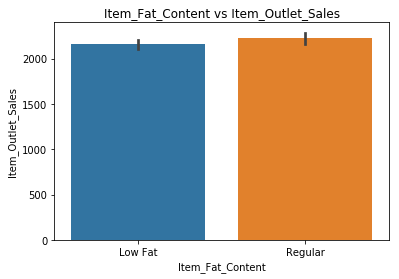

In [11]:
#Make a Exploratory Data Analysis on the data using pandas

sns.barplot(data  = ds, x = "Item_Fat_Content", y = "Item_Outlet_Sales").set_title\
("Item_Fat_Content vs Item_Outlet_Sales")



Text(0.5,1,'Outlet_Size vs Item_Outlet_Sales')

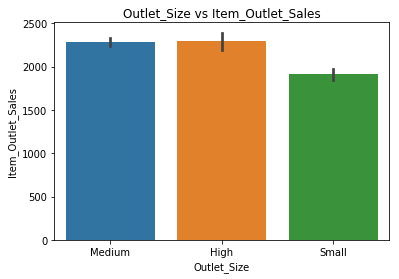

In [13]:
sns.barplot(data  = ds, x = "Outlet_Size", y = "Item_Outlet_Sales").set_title\
("Outlet_Size vs Item_Outlet_Sales")


Text(0.5,1,'Outlet_Type vs Item_Outlet_Sales')

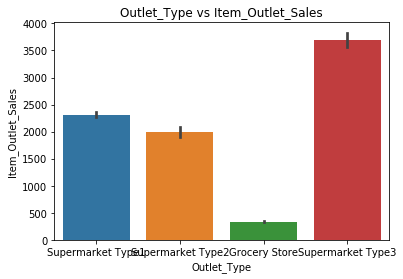

In [14]:
sns.barplot(data  = ds, x = "Outlet_Type", y = "Item_Outlet_Sales").set_title\
("Outlet_Type vs Item_Outlet_Sales")

Text(0.5,1,'Outlet_Location_Type vs Item_Outlet_Sales')

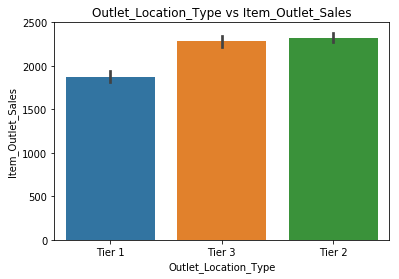

In [15]:
sns.barplot(data  = ds, x = "Outlet_Location_Type", y = "Item_Outlet_Sales").set_title\
("Outlet_Location_Type vs Item_Outlet_Sales")

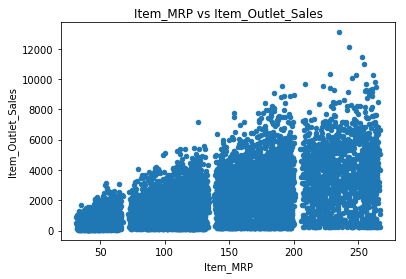

In [20]:
ds.plot( x = "Item_MRP", y = "Item_Outlet_Sales",kind = "scatter", title ="Item_MRP vs Item_Outlet_Sales")

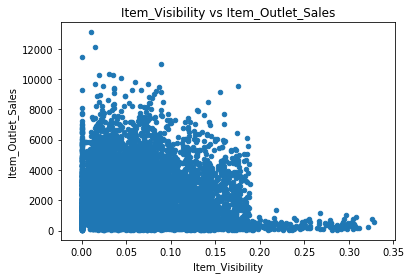

In [41]:
ds.plot( x = "Item_Visibility", y = "Item_Outlet_Sales",kind = "scatter", title ="Item_Visibility vs Item_Outlet_Sales")

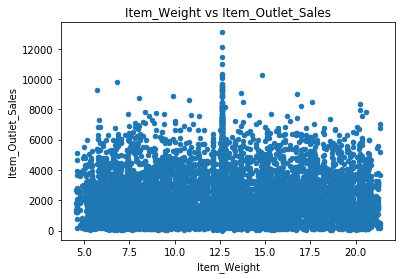

In [42]:
ds.plot( x = "Item_Weight", y = "Item_Outlet_Sales",kind = "scatter", title = "Item_Weight vs Item_Outlet_Sales")

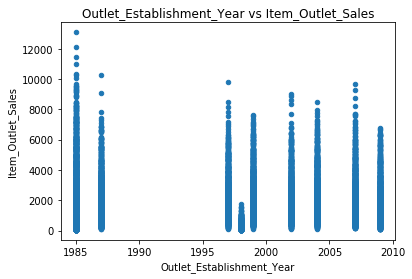

In [43]:
ds.plot( x = "Outlet_Establishment_Year", y = "Item_Outlet_Sales",kind = "scatter",\
        title ="Outlet_Establishment_Year vs Item_Outlet_Sales")

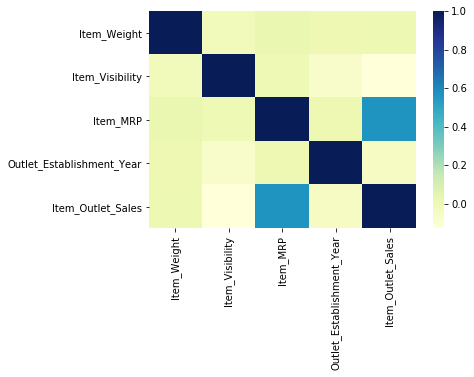

In [21]:
#Visualize distributions and correlation of features using seaborn and pandas

x = ds.columns
cor_mat = ds[x].corr()
sns.heatmap(cor_mat,cmap="YlGnBu")


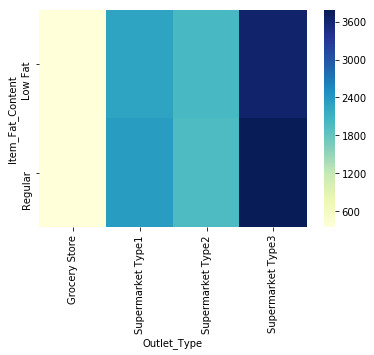

In [23]:
x = ds
x_matrix = pd.pivot_table(x,values="Item_Outlet_Sales",index='Item_Fat_Content',columns="Outlet_Type")
sns.heatmap(x_matrix, cmap='YlGnBu')

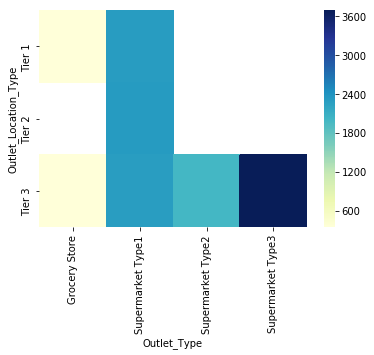

In [24]:
x = ds
#x_matrix = x.pivot("Outlet_Type", "Outlet_Location_Type")
x_matrix = pd.pivot_table(x,values="Item_Outlet_Sales",index='Outlet_Location_Type',columns="Outlet_Type")
sns.heatmap(x_matrix, cmap='YlGnBu')

In [26]:
#converting categorical data into numerical data
conv_list = ["Outlet_Type","Outlet_Location_Type","Item_Fat_Content","Outlet_Size","Item_Type","Outlet_Size"]
ds = pd.get_dummies(ds,columns = conv_list ,drop_first =True)

In [27]:
#selecting relevant features for feature engineering
attr = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3','Outlet_Establishment_Year']
#splitting the dataset into input data and target      
x = ds[attr]
y = ds["Item_Outlet_Sales"]


In [28]:
#test-train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)


In [29]:
from sklearn.linear_model import LinearRegression
#Build a linear regression model taking the selected features through feature engineering
regressor = LinearRegression(fit_intercept=True,normalize=True)
regressor.fit(x_train,y_train)
print("y_intercept:",regressor.intercept_)
print("slope:",regressor.coef_)

y_intercept: -88682.73669307715
slope: [-1.54690284e+00 -3.79556746e+02  1.55522974e+01  3.36098601e+01
 -6.02891043e+01 -8.25367989e+00  1.71004381e+01 -1.17333440e+02
 -6.85641122e+01 -1.09165212e+01 -1.19291940e+01 -5.01210050e+01
 -6.68902160e+01 -1.96091391e+01 -3.63461842e+01  1.87329806e+02
 -2.57829007e+01 -7.54832011e+01  6.75767574e+01  2.52961047e+15
 -2.52961047e+15 -2.44627431e+15  2.44627431e+15 -2.49815733e+02
 -4.85719756e+02  1.40937821e+03  1.11150697e+03  3.89833303e+03
  4.42412449e+01]


In [31]:
#predicting y over test data
y_pred = regressor.predict(x_test)

In [32]:
#getting r2_score to check accuracy level
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5620560606307248

In [34]:
#data prediction
x_res = ds[attr]
y_res = regressor.predict(x_res)

In [45]:
#creating results .csv file to store the pedicted item_outlet_sales for the test data

final = pd.DataFrame()
final['Item_Identifier'] = ds['Item_Identifier']
final['Outlet_Identifier'] = ds['Outlet_Identifier']

final["Item_Outlet_Sales"] = y_res
final = final.sort_index()
final.to_csv('C:/Users/hp/Desktop/Machine_Learning//ML_Projects/bigmart_ml_proj/Sales_Prediction.csv',index = False)